In [ ]:
import keras
import numpy as np
from keras.layers import Dense, Dropout, Input,Conv2D,Conv2DTranspose,BatchNormalization,Flatten,Reshape
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_____________________________________

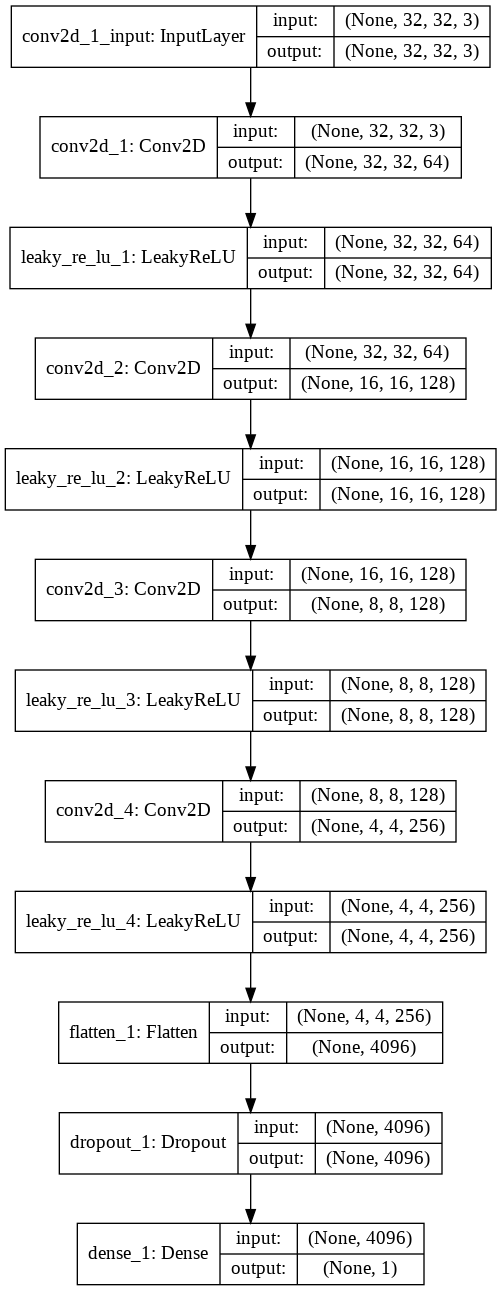

In [ ]:
# define the discriminator model

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):

    model = Sequential()
    #normal
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(BatchNormalization())

    # downsample to 16x16
    model.add(Conv2D(128, (3,3), strides=(2, 2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(BatchNormalization())
    # downsample to 8x8
    model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(BatchNormalization())
    # downsample to 4x4
    model.add(Conv2D(256, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classify
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt=Adam(lr=0.0001,beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

# define the discriminator model
x = define_discriminator()
# summarize the model
x.summary()
# plot the model

plot_model(x, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# define the generator model

def define_generator(latent_dim):

  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization())
  model.add(Reshape((4, 4, 256)))
  # upsample to 8X8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization())
  # upsample to 16X16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization())
  # upsample to 32X32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization())

  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  model.compile(loss='binary_crossentropy', optimizer='Adam')

  return model
# define the discriminator model
#x = define_generator(100)
# summarize the model
#x.summary()
# plot the model
#plot_model(x, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)  


In [ ]:
# create the composite model for training the generator
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
	return model

# create the discriminator
#discriminator = define_discriminator()
# create the generator
#generator = define_generator(100)
# create the gan
#gan_model = define_gan(generator, discriminator)
# summarize gan model
#gan_model.summary()
# plot gan model
#plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from keras.preprocessing.image import img_to_array,array_to_img
train_dir='/content/drive/My Drive/DATA/train/flower1'
c=1
img=[]
for files in os.listdir(train_dir):
        file_name=os.path.join(train_dir,files)
        
        print(file_name)
        x=keras.preprocessing.image.load_img(
    file_name,
      grayscale=False,
      color_mode='rgb',
      target_size=(28,28),
      interpolation='nearest'
  )
        img.append(keras.preprocessing.image.img_to_array(
      x,
      data_format=None,
      dtype=None
  ))    
        #cv2.imwrite('DIRECTORY2',tf.keras.preprocessing.image.img_to_array(x))
        c=c+1
  #plt.imshow(img)
print(type(x))
print('count',c)
X_train=np.array(img)
print(X_train.shape)
print(type(X_train))


In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/My Drive/GAN_pickle.rar", outdir="/content/drive/My Drive")


In [ ]:
import pickle
with open('/content/drive/My Drive/MAMMO_pickle1.pkl', 'rb') as f:
   train_data = pickle.load(f)


In [ ]:
print(train_data.shape)

(386, 256, 256, 3)


In [ ]:
def load_real_samples():
	# convert from unsigned ints to floats
	X = train_data.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

In [ ]:
m=load_real_samples()
print(m.shape)
print(type(m))
print(m[0])


(680, 32, 32, 3)
<class 'numpy.ndarray'>
[[[1.         0.81960785 1.        ]
  [1.         0.8980392  1.        ]
  [0.8901961  0.84313726 0.9529412 ]
  ...
  [0.77254903 0.8117647  0.84313726]
  [0.7254902  0.8117647  0.827451  ]
  [0.654902   0.78039217 0.78039217]]

 [[1.         0.84313726 1.        ]
  [0.9529412  0.88235295 1.        ]
  [0.8352941  0.7882353  0.8980392 ]
  ...
  [0.78039217 0.81960785 0.8509804 ]
  [0.7411765  0.827451   0.84313726]
  [0.6784314  0.7882353  0.79607844]]

 [[0.84313726 0.77254903 0.90588236]
  [0.8352941  0.81960785 0.92941177]
  [0.79607844 0.73333335 0.8509804 ]
  ...
  [0.7882353  0.8117647  0.8509804 ]
  [0.7647059  0.827451   0.8509804 ]
  [0.7176471  0.8039216  0.81960785]]

 ...

 [[0.02745098 0.1764706  0.3882353 ]
  [0.14509805 0.08235294 0.37254903]
  [0.5686275  0.23921569 0.6156863 ]
  ...
  [0.73333335 0.6862745  0.7647059 ]
  [0.67058825 0.7019608  0.77254903]
  [0.654902   0.7411765  0.7882353 ]]

 [[0.67058825 0.9137255  1.      

In [ ]:
def select_real_samples(dataset,n_samples):
  X =dataset[np.random.randint(low=0,high=dataset.shape[0],size=n_samples)]
  #a=np.random.uniform(9,10,n_samples)
  #y=a.reshape(n_samples,1)
  y=np.zeros(n_samples)  
  y[0:n_samples]=0.9
  #y = np.ones((n_samples, 1))
  return X,y


In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
			noise=(np.random.randn(latent_dim*n_samples))
			#noise=np.random.normal(0,1,(n_samples,latent_dim))
			noise=noise.reshape(n_samples,latent_dim)
			return noise
	# generate points in the latent space

In [ ]:
p=abs(np.random.randn(10*100))
p=p.reshape(10,100)
print(p.shape)
print(p[0])

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	noise = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(noise)
	# create class labels
	#a=np.random.uniform(0,1,n_samples)
	#y = a.reshape((n_samples, 1))
	y=np.zeros(n_samples)
	y[0:n_samples]=0.1
	return X, y

In [ ]:
import numpy as np
b=a.reshape(5,1)
print(a)
print(b)

[9.03818031 9.06483052 9.17595929 9.94620409 9.65217825]
[[9.03818031]
 [9.06483052]
 [9.17595929]
 [9.94620409]
 [9.65217825]]


In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	#examples = (examples + 1) / 2.0
	examples=examples.reshape(32,32,3)
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow((examples[i]*127.5+127.5).astype(np.uint32), interpolation='nearest')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()


In [ ]:
#CASE1
# evaluate the discriminator and plot real and fake points
latent_dim = 100
n_epochs=50

def summarize_performance(n_epoch, generator, discriminator,dataset,latent_dim, n=150):
	# prepare real samples
  x_real, y_real = select_real_samples(dataset,n)
	# evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  #print('EPOCH' % (n_epoch))
  print('ACCURACY REAL:%.0f%% ACCURACY FAKE:%.0f%%' % (acc_real*100,acc_fake*100))
  
  save_plot(x_fake,n_epoch)
  file_name='generator_model_%03d.h5' % (n_epoch+1)
  #filename = 'generator_model_%03d.h5' % (epoch+1)
  generator.save(file_name)
  noise=np.random.normal(loc=0,scale=1,size=(100,100))
  #noise= np.random.normal(loc=0, scale=1, size=[100, 100])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(100,32,32,3)
  plt.figure(figsize=(10,10))
  for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(((generated_images[i]*127.5)+127.5).astype('np.uint16'))
        plt.axis('off')
  plt.tight_layout()
  plt.savefig('predicted_gan_generated_image %d.png' %n_epoch)

# create the discriminator
discriminator = define_discriminator()
dim=(10,10)
# create the generator
generator = define_generator(latent_dim)
 

In [ ]:
#CASE2
# evaluate the discriminator and plot real and fake points
latent_dim = 100
n_epochs=60

def summarize_performance(n_epoch, generator, discriminator,dataset,latent_dim, n=50):
	# prepare real samples
  x_real, y_real = select_real_samples(dataset,n)
	# evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('EPOCH' ,n_epoch)
  print('ACCURACY REAL:%.0f%% ACCURACY FAKE:%.0f%%' % (acc_real*100,acc_fake*100))
  
  #save_plot(x_fake,n_epoch)
  #file_name='generator_model_%03d.h5' % (n_epoch+1)
  #filename = 'generator_model_%03d.h5' % (epoch+1)
  #generator.save(file_name)
  noise=np.random.normal(loc=0,scale=1,size=(50,100))
  noise.reshape(50,100)
  #noise= np.random.normal(loc=0, scale=1, size=[100, 100])
  generated_images = generator.predict(noise)
  print('Size',generated_images.shape)
  #generated_images = generated_images.reshape(50,32,32,3)
  plt.figure(figsize=(10,10))
  for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(((generated_images[i]*127.5)+127.5).astype('uint16'))
        #plt.imshow(generated_images[i])
        plt.axis('off')
        plt.title('EPOCH')
  plt.tight_layout()
  plt.savefig('predicted_gan_generated_image %d.png' %n_epoch)

# create the discriminator
discriminator = define_discriminator()
dim=(5,10)
# create the generator
generator = define_generator(latent_dim)
 

In [ ]:
# train the generator and discriminator
#from numpy import vstack
def train(generator, discriminator, gan_model,dataset, latent_dim, n_epochs=60, n_batch=32):
  # gan training algorithm
      tot_batch = int(dataset.shape[0]/n_batch)
      #print(tot_batch)
     	# determine half the size of one batch, for updating the discriminator

      half_batch = int(n_batch / 2)
      #print(half_batch)
      for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(tot_batch):
          # get randomly selected 'real' samples
          X_real, y_real = select_real_samples(dataset,half_batch)
          d_loss1,_ = discriminator.train_on_batch(X_real, y_real)
          print('loss1',d_loss1)
          # generate 'fake' examples
          X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
          d_loss2,_ = discriminator.train_on_batch(X_fake, y_fake)
          print('loss2',d_loss2)
          # create training set for the discriminator
          #X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
          # update discriminator model weights
          # prepare points in latent space as input for the generator
          X_gan = generate_latent_points(latent_dim, n_batch)
          # create inverted labels for the fake samples
          #a=np.random.uniform(9,10,n_batch)
          #y_gan=a.reshape(n_batch,1)
          y_gan=np.zeros(n_batch)
          y_gan[0:n_batch]=0.9
          #y_gan = np.ones((n_batch, 1))
          # update the generator via the discriminator's error
          g_loss= gan_model.train_on_batch(X_gan, y_gan)
          # summarize loss on this batch
          #print('real_loss_perbatch=%.3f,fake_lossperbatch=%.3f,gen_loss_perbatch=%.3f' % (i+1,j+1,tot_batch,d_loss1,d_loss2,g_loss))
          #print('>real_loss_perbatch=%.3f,fake_loss_perbatch=%.3f,gen_loss_perbatch=%.3f' % (i+1,j+1,tot_batch,d_loss1,d_loss2,g_loss))     if (i+1) % 10 == 0:
        if ((i+1)%1)==0:
            summarize_performance(i, generator, discriminator,dataset, latent_dim)
          
# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
#load image data
dataset=load_real_samples()
# train model
train(generator, discriminator, gan_model,dataset,latent_dim)


# serialize model to JSON
model_json = gan_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
gan_model.save_weights("gan_model.h5")
print("Saved model to disk")
model_json1 = generator.to_json()
with open("model.json1", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
generator.save_weights("generator.h5")
print("Saved model to disk")
!mkdir -p saved_model
generator.save('saved_model/my_model') 




In [ ]:
# later...

# load json and create model
json_file = open('gan_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("gan_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))